#**Magic Gamma Telescope dataset**
Downloaded from https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope   On the 31/10/2022


I chose this dataset because it’s about a subject that I’m very interested in and working on this dataset will enable me to work in two fields I enjoy; Astronomy and Computer Science.

The Magic Gamma Telescope dataset contains data that is a simulation of registration of high energy particles picked up by a ground-based Cherenkov telescope. This dataset will be used to build a model that can differentiate between particles that are picked up by the telescope’s sensor. These particles are gammas(signal) and hadronic showers(background).  

## **Research**

The paper is a case study comparing different multivariate classification methods on the magic04 dataset. It describes the dataset and its variables in detail, mentioning that since there is a weak discrimination between the two classes (gamma signals and hadrons background) the dataset is a perfect proving ground for a classification study.  
The paper details how there is a large quantity of general multivariate classification methods available, but with little to no information about their individual virtues and shortcomings. As some are available on the commercial market this was the primary motivation for the case study.  
Many different classification methods are compared. They use classification trees and forests (C5.0, CART, random forest), kernel methods, artificial neural networks (NeuNet, NSSU, GMDH, MRS, MLP), nearest neighbours, support vector machines, composite probabilities and linear discriminant analysis.
The results from classification trees, kernel and nearest neighbour methods were observed to be very similar in terms of performance. Neural networks results vary from among the best to rather mediocre, the reason for this is not fully understood and shows that there are many different neural net methods with varying outcomes. The study also concludes that in this dataset LDA and SVM can be considered inferior. The three decision tree classification methods all use multiple trees, but random forest seems to outperform the others.  
Overall, the paper reaches no definite conclusion as to which ML algorithm is best to use, mentioning that extrapolating this conclusion to different datasets won’t yield the same results. However, this study might help us discard some of the inferior methods in some cases, and, for this specific dataset, was very insightful.  
The study led me to discover more algorithms and expand my knowledge on the subject. It will help me when deciding what model is best for my dataset and for future datasets.


#**Data Exploration**
**Getting a first look at the data**

In [ ]:
#cell just for imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy import interpolate
from sklearn import metrics

In [ ]:

#loading the csv file into a dataframe
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data")

#naming the columns
df.columns=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

#intitial view of dataset
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


From the describe() method we can get a good idea of the distribution of our data. The range of the values of the features is varied in scale; for example the fAsym feature varies from -457 to 575, while the fConc value ranges from 0.013 to 0.89.   This indicates that normalization or standardization might be needed to improve the success rates of our algorithms.  
The difference between the mean and the max might also be a sign of "noisy" data.

In [ ]:
##printing out the number of columns
print(f"in this dataset we have {len(df.columns)} attributes and they are \n")
print(', '.join(df.columns))

in this dataset we have 11 attributes and they are 

fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist, class


Using the info() method will display useful information about values in the dataset. In this case it shows that the dataset has no null values. It also shows that all the values are of type float64, apart from the class column that is of type object.

In [ ]:
#checking datatypes of variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19019 non-null  float64
 1   fWidth    19019 non-null  float64
 2   fSize     19019 non-null  float64
 3   fConc     19019 non-null  float64
 4   fConc1    19019 non-null  float64
 5   fAsym     19019 non-null  float64
 6   fM3Long   19019 non-null  float64
 7   fM3Trans  19019 non-null  float64
 8   fAlpha    19019 non-null  float64
 9   fDist     19019 non-null  float64
 10  class     19019 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None


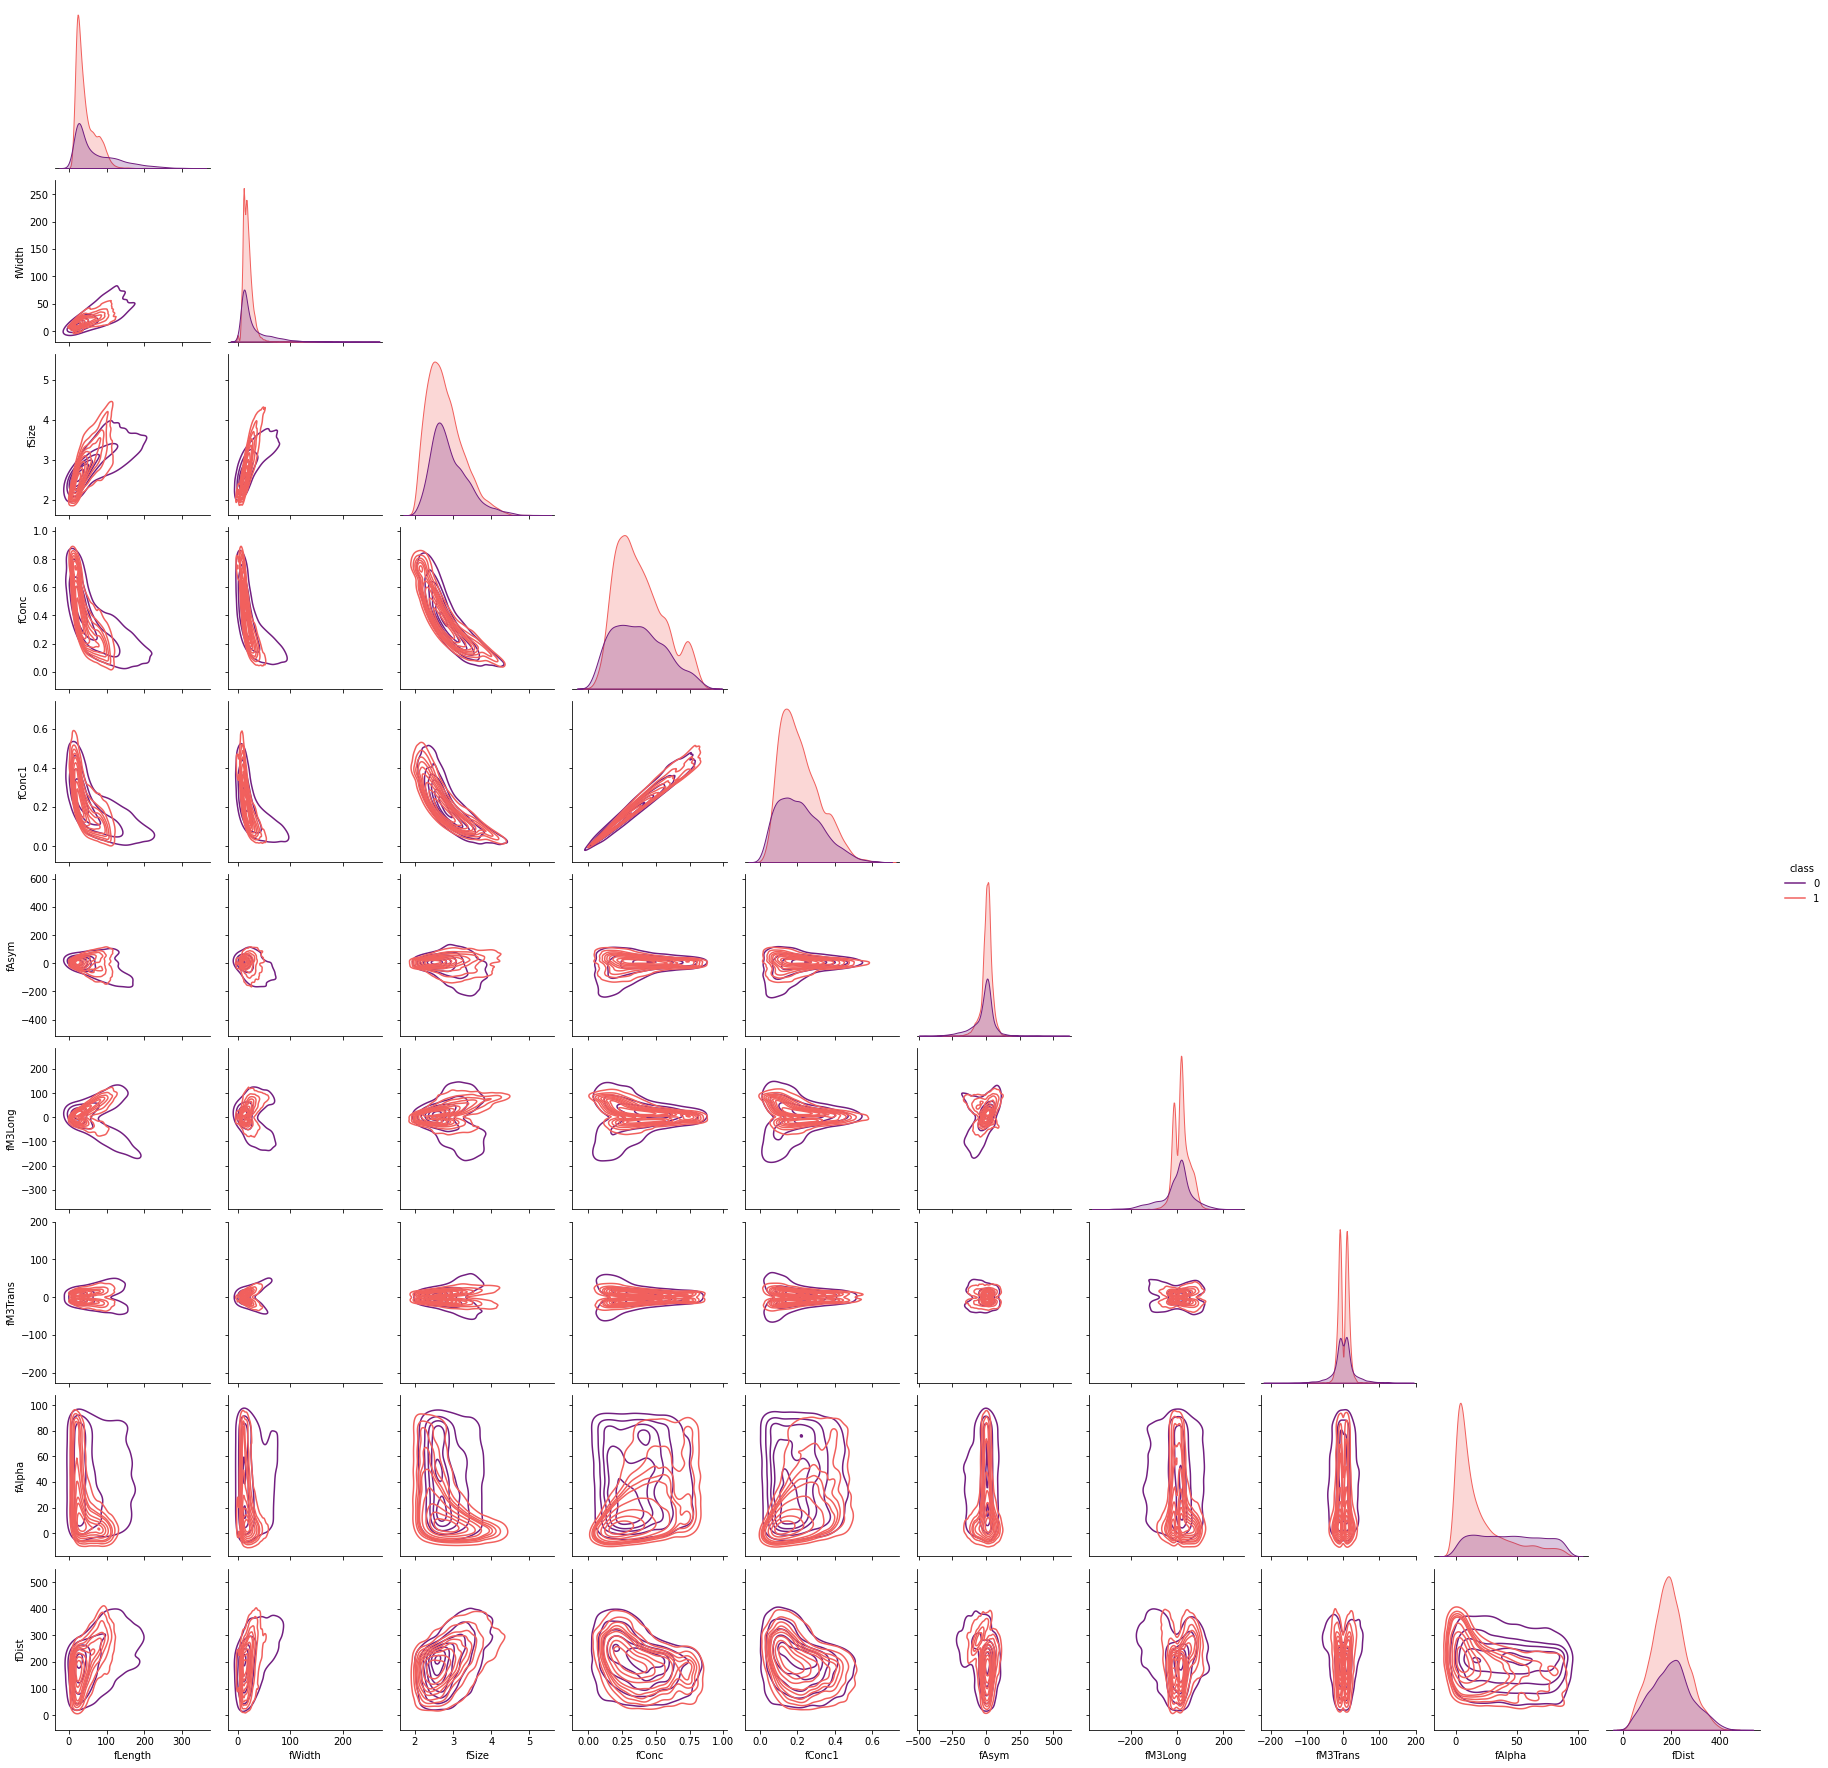

In [ ]:
sns.pairplot(
    data=df,
    hue="class",
    kind="kde",
    corner=True,
    palette="magma",
)

###***-Checking for null values***

In [ ]:
#serching for values that are null
df.isnull().values.any()

False

###***-Data correlation***  
Visualizing the correlation between variables in the dataset

[]

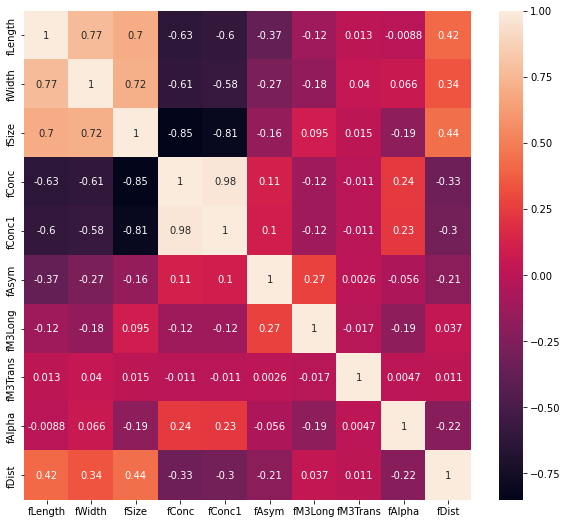

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
ax = plt.figure(figsize=(10,9))
ax = sns.heatmap(correlation_matrix,annot=True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.plot()

Some variables in the dataset appear to be highly correlated, with the correlation between fConc and fConc1 being 98%. We could drop fConc1(code below), however this only resulted in a fractional perfomance increase with Logistic regression while all the other methods resulted in a slight performance decrease. So for this test I won't be dropping the fConc1 feature from the dataset.

In [ ]:
#upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
#print(to_drop)
#dropping the fconc1 value
#df.drop(to_drop,axis=1,inplace=True)
#df.head()

It's possible to visualize the linear relation of the two features. From the graph below you can observe their similarity

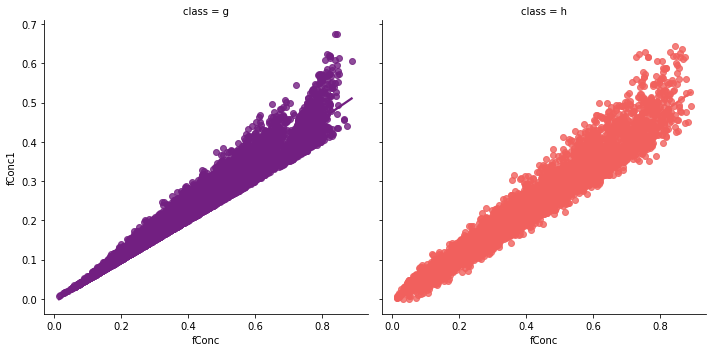

In [ ]:
#plotting realationship between fconc1 and fconc
ax = sns.lmplot(x = 'fConc', y = 'fConc1',col="class", data = df, hue ='class',palette="magma")
ax.set(xlabel='fConc', ylabel='fConc1')

###***-Class distribution***

Class distribution is a description of how many instances in a dataset have 
a specific outcome.  
In the case of this dataset the class distribution is how many rows have an outcome of "g" and how many rows have an outcome of "h".
If the dataset is overwhelmeingly balanced in favour of one dataset then it is considered an imbalanced dataset.


 g    12331
h     6688
Name: class, dtype: int64 

the rows of class g comprize 65% of the total cases in the dataset
the rows of class f comprize 35% of the total cases in the  dataset


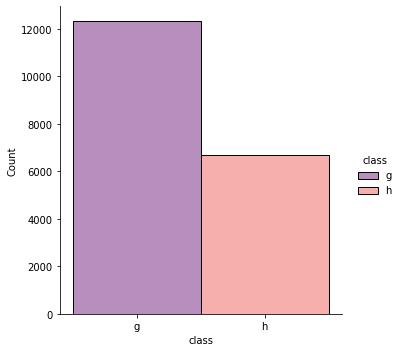

In [ ]:
#getting the nuber of cases for each targhet 
print("\n",df["class"].value_counts(),"\n")

#drawing a parplot with with x = class
sns.displot(df, x="class",hue="class",palette="magma")

#getting nuber of cases for each class
dfOfG = (df["class"] == "g")
dfOfH = (df["class"] == "h")
numG = len(df[dfOfG])
numH = len(df[dfOfH])

#displying the class distribution as a percentage
print(f"the rows of class g comprize {round(numG/len(df)*100)}% of the total cases in the dataset")
print(f"the rows of class f comprize {round(numH/len(df)*100)}% of the total cases in the  dataset")

In the case of this dataset the distribution of "g" and "h" is 65% and 35%. Although this is not an overwhelmingly unbalanced dataset, we will see a lower accuracy and recall for the "h" class as it has less "representation" in the dataset.

#**Data Pre-Processing**

This dataset doesn't have any missing values and isn't imbalanced, so the preprocessing section of this notebook will only focus on splitting the data and changing some types.

To facilitate modelling and classification the values of "g" and values of "h" were changed to 1 and 0 respectively.






In [ ]:
df["class"].replace(["g","h"],[1,0],inplace=True)
df["class"].value_counts()

1    12331
0     6688
Name: class, dtype: int64

Splitting the dataset into x and y variables with the y = "class".
Dividing the x and y sets into two further subsets using and 80-20 split.   Keeping the 80% sets for training and the 20% sets for testing.

In [ ]:
x = df.drop("class",axis = 1)
y = df["class"]

#splitting the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

Data normalization will bring all values in range 0-1 using the following formula.

> (x-min(x))/(max(x)-min(x))

Creating normalized x training data to see what the impact of normalization is on machine learning algorithms

In [ ]:
#normalizing the traing and testing variables
normalized_x_train = preprocessing.normalize(x_train)
normalized_x_test = preprocessing.normalize(x_test)

Standardizing data will bring data to the same level using the following formula

> (x-mean)/standard deviation

Creating a standardized training set to see what the impact of standardization is on the models.

In [ ]:
#standardizing data
scalar = StandardScaler()
standardized_x_train = scalar.fit_transform(x_train)
standardized_x_test = scalar.fit_transform(x_test)

#***2) Modelling and classification***

In this section three machine learning models are analyized using: normalized, standardized and non-processed data.
After each model is evaluated the best one in terms of performance and accuracy will be chosen to create the final model for the dataset.

###**Logistic regression**

running a logistic regression algorithm with base values for max iterations and lbfgs as a solver

In [ ]:
lg_model = LogisticRegression(solver='lbfgs',max_iter=3000)

#fitting the values in the logistic regression algorithm
lg_model.fit(x_train,y_train)
linear_y_pred= lg_model.predict(x_test)


#fitting the normalized values in the logistic regression algorithm
lg_model.fit(normalized_x_train,y_train)
normalized_y_pred = lg_model.predict(normalized_x_test)

#fitting the standardised values into the logistic regression algorithm
lg_model.fit(standardized_x_train,y_train)
standardized_y_pred = lg_model.predict(standardized_x_test)
#printing the logistic regression reults
print(f"the Logistic regression alogorithms accuracy on the testing set is: {round(accuracy_score(y_test,linear_y_pred),2)}")
print(f"the Logistic regression alogorithms accuracy on the normalized testing set is: {round(accuracy_score(y_test,normalized_y_pred),2)}")
print(f"the Logistic regression alogorithms accuracy on the standardized testing set is: {round(accuracy_score(y_test,standardized_y_pred),2)}")

the Logistic regression alogorithms accuracy on the testing set is: 0.79
the Logistic regression alogorithms accuracy on the normalized testing set is: 0.73
the Logistic regression alogorithms accuracy on the standardized testing set is: 0.79


The model’s accuracy with normal data and  standardized data is the same, however accuracy with normalized data drops by a significant margin. This shows that having a standard distribution of data might negatively impact our model and that outliers might be important for prediction

              precision    recall  f1-score   support

           0       0.77      0.59      0.66      1366
           1       0.80      0.90      0.84      2438

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.79      0.79      0.78      3804



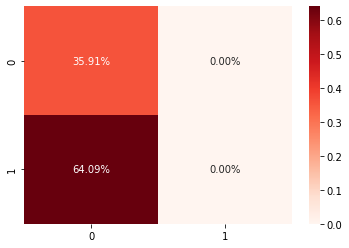

In [ ]:
#getting the confusion matrix
linear_cf_matrix = confusion_matrix(y_test,standardized_y_pred)

#plotting the confusion matrix
sns.heatmap(linear_cf_matrix/np.sum(linear_cf_matrix), annot=True,fmt='.2%', cmap='Reds')

#printing the classification report
print(classification_report(y_test,linear_y_pred))

After visualizing the confusion matrix and the classification report It’s possible to see that, as expected, classification of the “h” events is less accurate by a small margin compared to “g”. This is due to the class distribution

##**Decision Tree**

In [ ]:
def findBestTreeDepth(depth,xTrainData,xTestData):
  bestAccuracy=0
  max_depth_vals = list(range(1, depth))
  depth = 0;
  for max_depth in max_depth_vals:
      clf = DecisionTreeClassifier(max_depth = max_depth,
      random_state = 0)
      # fit the data
      clf.fit(xTrainData, y_train)
      # get accuracy and store it in the list accuracy
      accuracy = clf.score(xTestData, y_test)
      if accuracy>bestAccuracy:
        bestAccuracy=accuracy
        depth+=1
  return depth

In [ ]:
#finding best depth 
tree_depth=findBestTreeDepth(12,x_train,x_test)
n_tree_depth=findBestTreeDepth(12,normalized_x_train,normalized_x_test)
s_tree_depth=findBestTreeDepth(12,standardized_x_train,standardized_x_test)

#running the decision tree model for all three types of data
dtf = DecisionTreeClassifier(max_depth = tree_depth,random_state =0)
n_dtf =  DecisionTreeClassifier(max_depth =n_tree_depth,random_state=0)
s_dtf =  DecisionTreeClassifier(max_depth =tree_depth,random_state=0)

# Get the model's accuracy
dtf.fit(x_train, y_train)
accuracy = dtf.score(x_test, y_test)
print(f'The Model Accuracy with non-processed data is {round(accuracy*100,2)}%')
n_dtf.fit(normalized_x_train, y_train)
n_accuracy = n_dtf.score(normalized_x_test, y_test)
print(f'The Model Accuracy with normalized data is {round(n_accuracy*100,2)}%')
s_dtf.fit(standardized_x_train, y_train)
s_accuracy = s_dtf.score(standardized_x_test, y_test)
print(f'The Model Accuracy with standardized data is {round(s_accuracy*100,2)}%')

The Model Accuracy with non-processed data is 84.38%
The Model Accuracy with normalized data is 80.65%
The Model Accuracy with standardized data is 84.04%


After running the decision trees with The best depth and the different types of data, we can see that, as before, standardized and normal data have a very similar model precision but normalized data seems to reduce the total accuracy score of the model

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      1366
           1       0.84      0.93      0.88      2438

    accuracy                           0.84      3804
   macro avg       0.84      0.80      0.82      3804
weighted avg       0.84      0.84      0.84      3804



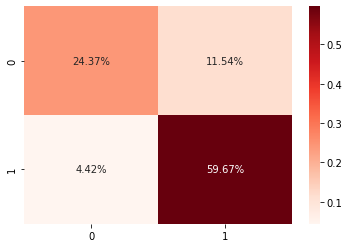

In [ ]:
#printing random forest
dtf.fit(standardized_x_train,y_train)
dtf_preds = dtf.predict(standardized_x_test)

rf_cf_matrix = confusion_matrix(y_test,dtf_preds)

#plotting the confusion matrix
sns.heatmap(rf_cf_matrix/np.sum(rf_cf_matrix), annot=True,fmt='.2%', cmap='Reds')

#printing the classification report
print(classification_report(y_test,dtf_preds))

Observing the confusion matrix of the decision tree classifier a smaller drop in precision between "h" and "g" events can be observed. Overall the number of false positives and false negatives decreased from the linear regression model and recall increased.

##**Random forest**

In [ ]:
rf = 0
def runRandomForest(xData,xTestData):
  rf=RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state = 0)
  rf.fit(xData,y_train)
  print(rf.get_params())
  predictions = rf.predict(xTestData)
  accuracy = accuracy_score(y_test,predictions)
  print(f"the accuracy of random forest is: {round(accuracy*100,2)}")
  return predictions

In [ ]:
print("with normal data")
rf_predictions = runRandomForest(x_train,x_test)
print("with normalized data")
normalized_rf_predictions = runRandomForest(normalized_x_train,normalized_x_test)
print("with standardized data")
standardized_rf_predictions = runRandomForest(standardized_x_train,standardized_x_test)

with normal data
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
the accuracy of random forest is: 87.33
with normalized data
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
the accuracy of random forest is: 85.04
with standardized data
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 

For random forest classification normalized data still negatively impacts the results however standardized data this time provides a small increase in precision over normal data

In [ ]:
print(classification_report(y_test,rf_predictions))
print(classification_report(y_test,normalized_rf_predictions))
print(classification_report(y_test,standardized_rf_predictions))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1366
           1       0.87      0.94      0.91      2438

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



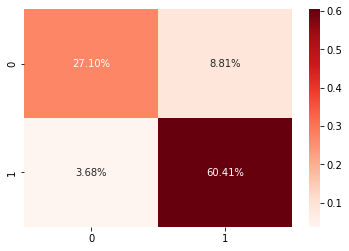

In [ ]:
#printing random forest
rf=RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state = 0)
rf.fit(standardized_x_train,y_train)
rf_preds = rf.predict(standardized_x_test)

rf_cf_matrix = confusion_matrix(y_test,rf_preds)

#plotting the confusion matrix
sns.heatmap(rf_cf_matrix/np.sum(rf_cf_matrix), annot=True,fmt='.2%', cmap='Reds')

#printing the classification report
print(classification_report(y_test,rf_preds))

Observing the heatmap we can see an increase in performance and a drop in false positive rates and false negative rates, with an increase in recall and precision over the previous models.

##***Model Selection***


After running all the above models, Random forest has the best accuracy and recall scores. To better visualize the difference between all these classification methods the ROC curve and the AUC(Area under the curve) score can be utilized

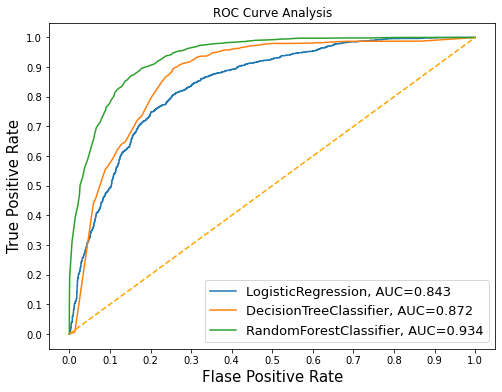

In [ ]:
classifiers =[lg_model,dtf,rf]
results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and store the results
for cls in classifiers:
  # fit the data
  model = cls.fit(x_train, y_train)
  # get predictions as probabilities
  # notice that predict_proba returns array (n_samples, n_classes)
  yproba = model.predict_proba(x_test)[:,1]
  fpr, tpr, thres = roc_curve(y_test, yproba,drop_intermediate=False)
  
# get the auc (area under the curve)
  auc = roc_auc_score(y_test, yproba)
# add results to the table
  results = results.append({'classifiers':cls.__class__.__name__,
  'fpr':fpr,
  'tpr':tpr,
  'auc':auc}, ignore_index=True)
  # Set name of the classifiers as index labels
results.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in results.index:
  plt.plot(results.loc[i]['fpr'],
  results.loc[i]['tpr'],
  label="{}, AUC={:.3f}".format(i, results.loc[i]['auc']))

# plot the random model (diagonal)
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontsize=12)
plt.legend(prop={'size':13}, loc='lower right')



The graph clearly shows that random forest in this case is the best method for classification as it's ACU score of 0.934 is the closest to the perfect score of 1

#***3) Solution Improvement***

In this part of the notebook we will be fine tuning the parameters of the random forest algorithm to see if we can improve its performance while also preventing overfitting

In [ ]:
rf = RandomForestClassifier()
##getting details of the random forest algoritm currently in use
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Out of the above parameters the ones that will be finetuned are max_depth(max level number in each tree),max_features(max number of features considered for splitting node) and n_estimators(number of trees in the forest),min_samples_split(min amount of data placed in a node before it is split),min_samples_leaf(minimum amount of data points allowed in a leaf) and random state

In [ ]:
max_depth=[int(x) for x in np.linspace(10, 110, num = 11)]
max_features=max_features = ['auto', 'sqrt']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
random_state = [int(x) for x in np.linspace(start = 0,stop =100,num =10)]
criterion=["gini","entropy"]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
#adding items to grid
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'random_state':random_state,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    "criterion":criterion
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'max_features': ['auto', 'sqrt'], 'random_state': [0, 11, 22, 33, 44, 55, 66, 77, 88, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}


We can test a range of parameters on our classification method of choice using RandomizedSearchCV. The randomized search function has a parameter n_iter that details how many iterations it will perform, to many iterations might improve on performance but also increase training times

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(standardized_x_train,y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'random_state': [0, 11, 22, 33, 44, 55,
                                                         66, 77, 88, 100]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'random_state': 44,
 'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'criterion': 'gini'}

the accuracy of random forest is: 87.7
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1366
           1       0.88      0.94      0.91      2438

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



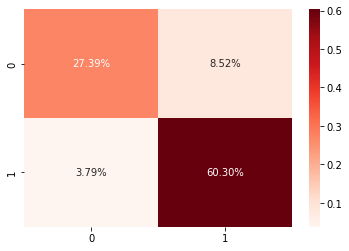

In [ ]:
#running random forest with these outcomes and getting accuracy
fineTuned_rf = RandomForestClassifier(n_estimators=900, max_features='auto', max_depth = 70,random_state=44,min_samples_leaf=2,min_samples_split=5,criterion="gini")
fineTuned_rf.fit(standardized_x_train,y_train)

predictions = fineTuned_rf.predict(standardized_x_test)
accuracy = accuracy_score(y_test,predictions)
print(f"the accuracy of random forest is: {round(accuracy*100,2)}")

rf_preds = fineTuned_rf.predict(standardized_x_test)

rf_cf_matrix = confusion_matrix(y_test,rf_preds)

#plotting the confusion matrix
sns.heatmap(rf_cf_matrix/np.sum(rf_cf_matrix), annot=True,fmt='.2%', cmap='Reds')

#printing the classification report
print(classification_report(y_test,rf_preds))

In Conclusion the best method for classification of this dataset was random forest.
After the best parameters for the classification were found, a final accuracy score of 87.7 percent was achieved only a small increase from over the 87.3% accuracy achieved without fine-tuning this also took significantly more time to train. The confusion matrix indicates the methods overall performance